<a href="https://colab.research.google.com/github/Rizkifadillah/googlecolab/blob/main/titanic_data_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
dft = pd.read_csv('/content/drive/MyDrive/course_ipynb/Kumpulan_dataset/titanic.csv')

In [44]:
dft.sample(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
314,315,0,2,"Hart, Mr. Benjamin",male,43.00,1,1,F.C.C. 13529,26.2500,NaN,S
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.00,0,0,113786,30.5000,C104,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.00,0,2,110413,79.6500,E68,S
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.00,1,0,228414,26.0000,NaN,S
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.00,0,0,364516,12.4750,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.00,0,0,349245,7.8958,NaN,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,NaN,S
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.00,0,1,3101298,12.2875,NaN,S


In [26]:
# mengetahui jumlah baris dan kolom pada dataset
dft.shape

(891, 12)

**Melihat Record yang Missing**

In [45]:
dft.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Melihat Data Missing dengan visualisasi**

<AxesSubplot:>

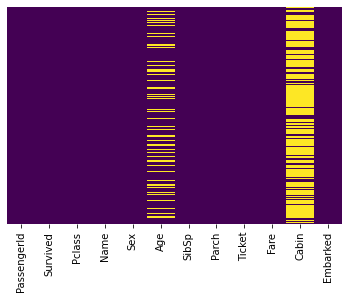

In [29]:
sns.heatmap(dft.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cmap=['magma','inferno','plasma']

**Mengganti Age dengan berbagai metode**

In [50]:
# menghitung jumlah dari total masing masing Pclass
dft.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Dengan mengasumsikan Pclass = tiket kelas 1,2,3
1.   First Class
2.   Bussiness Class
3.   Economy Class



In [51]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37

    elif Pclass == 2:
      return 29

    else:
      return 24

  else:
    return Age

In [41]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Kolom umur

In [52]:
dft['Age'].fillna(value=dft['Age'].mean(), inplace=True)

In [ ]:
# dft['Age'] = dft[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

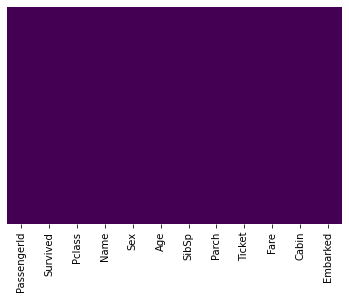

In [53]:
sns.heatmap(dft.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cmap=['magma','inferno','plasma']

Kolom Cabin

In [35]:
# menghilangkan data kolom cabin yang banyak kosongnya
dft.drop('Cabin', axis=1, inplace=True)

In [48]:
dft.Cabin = dft.Cabin.fillna("unknown")

<AxesSubplot:>

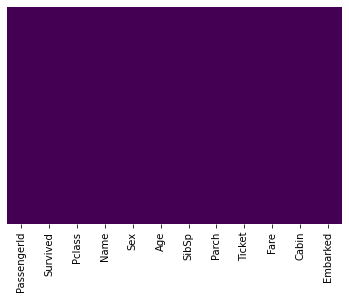

In [54]:
sns.heatmap(dft.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cmap=['magma','inferno','plasma']

In [56]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
dft.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [58]:
# masih ada 2 data Embarked yg kosong
dft.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [59]:
# kita isi dengan tipe yg paling banyak yaitu S
dft.Embarked = dft.Embarked.fillna("S")

In [60]:
dft.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [61]:
dft

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [64]:
dft.to_csv('/content/drive/MyDrive/course_ipynb/Kumpulan_dataset/clean_data_titanic.csv')